In [1]:
import math
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import numba
from numba import njit
import time
from matplotlib.pyplot import figure
from numba.typed import List
from collections import defaultdict


In [2]:
n = 200
item= []
for i in range(n//4):
    a= rd.randint(20,30)
    b= rd.randint(20,30)
    item.append(np.array([a,b], np.int_))
for i in range(n//4):
    a= rd.randint(10,20)
    b= rd.randint(50,80)
    item.append(np.array([a,b], np.int_))
for i in range(n//4):
    a= rd.randint(80,90)
    b= rd.randint(20,30)
    item.append(np.array([a,b], np.int_))
for i in range(n//4):
    a= rd.randint(80,90)
    b= rd.randint(70,90)
    item.append(np.array([a,b], np.int_))
item= np.array( item, np.int_)
min_length = min([item_i[0] for item_i in item])
length= 500

In [3]:
@njit
def shelf(s, item):
    total = length
    count = 0
    max_width=0
    min_width=np.inf
    cost=0
    list_bin = np.empty((0, 2), np.int_)
    for i in range(len(s)):
        change = False
        for j in range(len(list_bin)):
          if list_bin[j][0] >= item[s[i], 0] and list_bin[j][1] >= item[s[i],1]:
              list_bin[j][:] = [list_bin[j][0]-item[s[i],0], list_bin[j][1]]
              change = True
              if list_bin[j][0] < min_length:
                  new_list_bin = new_list_bin = np.empty((len(list_bin) -1 , 2), np.int_)
                  new_list_bin[:j] = list_bin[:j]
                  new_list_bin[j:] = list_bin[j+1:]
                  list_bin = new_list_bin
              break
        if change: continue
        if total >= item[s[i],0]:
            total-= item[s[i],0]
            if max_width< item[s[i],1]:
                max_width =  item[s[i],1]
            if min_width> item[s[i],1]:
                min_width =  item[s[i],1]
        else:
          if total >= min_length:
            new_list_bin = np.empty((len(list_bin) + 1, 2), np.int_)
            new_list_bin[:-1] = list_bin
            new_list_bin[-1] = np.array([total,max_width], np.int_)
            list_bin = new_list_bin
          cost+= max_width
          total = length- item[s[i],0]
          count+=1
          max_width=item[s[i],1]
          min_width=item[s[i],1]
    cost += max_width
    return cost, count

In [4]:
@njit
def ls(s,k, item):
    best_cost, best_count = shelf(s,item)
    print(best_cost, best_count)
    for _ in range(k):
        new_item = np.copy(item)
        j = len(s)%k
        for i in range(j-len(s), j):
            new_item[s[i],0], new_item[s[i],1]= new_item[s[i],1], new_item[s[i],0]
            a,b =  shelf(s,new_item)
            if a < best_cost:
                item = new_item.copy()
                best_cost=a
                best_count=b
                print(best_cost, best_count)
    for _ in range(k):
        new_item = np.copy(item)
        i= rd.randint(0,len(s)-2)
        j= rd.randint(i+1,len(s)-1)
        new_item[s[i]], new_item[s[j]]= new_item[s[j]].copy(),new_item[s[i]].copy()
        a,b= shelf(s, new_item)
        if a < best_cost:
            item = new_item.copy()
            best_cost = a
            best_count = b
            print(best_cost, best_count)
    return item

In [7]:
A= list(range(len(item)))
A.sort(key= lambda x:-item[x][1])
s = np.array(A, np.int_)
item = ls(s,1000,item)
shelf(s,item)

1125 21
1124 21
1122 21
1121 21


(1121, 21)

(1121, 21)
[[175, 183, 156, 151, 163, 77, 92, 52], [64, 68, 63, 50, 191, 178, 159, 162, 181], [199, 170, 198, 150, 172, 54, 73, 53, 62, 80], [97, 94, 71, 75, 186, 196, 189, 176, 174], [190, 160, 164, 188, 177, 99, 55, 81, 60, 72], [95, 91, 51, 69, 182, 173, 166, 154, 180], [184, 152, 157, 153, 167, 57, 88, 96, 59, 67], [78, 98, 89, 86, 90, 197, 192, 165, 187, 171], [155, 158, 168, 185, 193, 84, 83, 87, 61], [74, 56, 58, 76, 195, 194, 179, 169, 161], [82, 93, 65, 66, 70, 79, 85, 104, 121, 129, 133, 0, 15], [48, 35, 113, 102, 46, 45, 42, 29, 24, 22, 20, 18, 137], [116, 125, 135, 142, 145, 4, 6, 13], [2, 25, 16, 141, 124, 112, 110, 100], [143, 38, 109, 118, 122, 130, 1], [134, 108, 103, 41, 36, 9, 144, 131], [5, 32, 39, 40, 47, 111, 114, 128, 146, 7, 14], [19, 148, 147, 126, 107, 44, 149], [26, 27, 30, 31, 37, 101, 3, 43, 106, 138, 8, 10], [17, 12, 127, 119, 117, 49, 33, 21, 11, 139], [23, 28, 34, 105, 115, 120, 123], [140, 136, 132]]


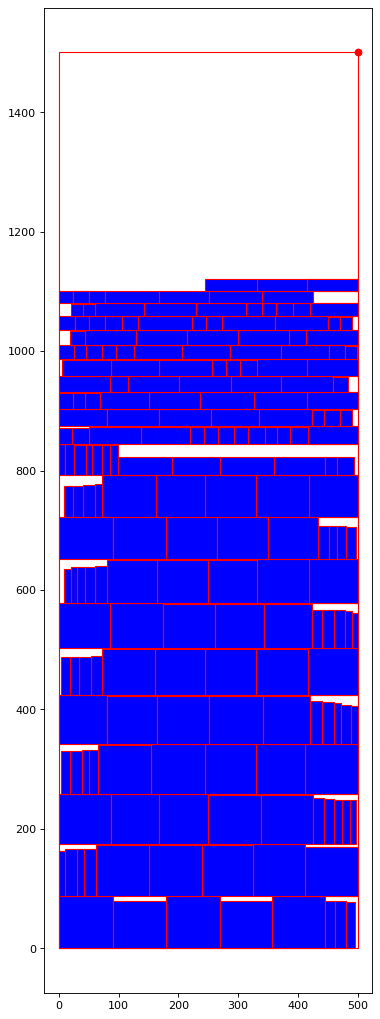

In [8]:
from matplotlib.patches import Rectangle
def rec(x,y,l,w,color):
    rec= Rectangle((x,y),l,w,linewidth=1,edgecolor='r',facecolor=color)
    plt.gca().add_patch(rec)


from matplotlib.pyplot import figure
def shelf_draw(s):
    figure(figsize=(8, 16), dpi=80)
    total = length
    count = 0
    max_width=0
    min_width=100000000
    cost=0
    plt.gca().set_aspect('equal')

    plt.plot(500, 1500, "ro")
    rec(x=0,y=0,l=length,w=1500,color="none")
    pv_x=0
    pv_y=0
    list_bin = np.empty((0, 5), np.int_)
    reverse = False
    solution = [[]]
    for i in range(len(s)):
        change = False
        for j  in range(len(list_bin)):
          if list_bin[j][0] >= item[s[i], 0] and list_bin[j][1] >= item[s[i],1]:
              if list_bin[j][4]%2 == 1:
                  rec(x=list_bin[j][2]-item[s[i],0], y=list_bin[j][3],l=item[s[i],0],w=item[s[i],1],color="blue")
                  list_bin[j][:] = [list_bin[j][0]-item[s[i],0], list_bin[j][1], list_bin[j][2] - item[s[i],0], list_bin[j][3], list_bin[j][4]]
                  solution[list_bin[j][4]].insert(0, s[i])
              else:
                  rec(x=list_bin[j][2], y=list_bin[j][3],l=item[s[i],0],w=item[s[i],1],color="blue")
                  list_bin[j][:] = [list_bin[j][0]-item[s[i],0], list_bin[j][1], list_bin[j][2] + item[s[i],0], list_bin[j][3], list_bin[j][4]]
                  solution[list_bin[j][4]].append(s[i])
              if list_bin[j][0] < min_length:
                  new_list_bin = np.empty((len(list_bin) - 1, 5), np.int_)
                  new_list_bin[:j] = list_bin[:j]
                  new_list_bin[j:] = list_bin[j+1:]
                  list_bin = new_list_bin
              change = True
              break
        if change: continue
        if total >= item[s[i],0]:
            total-= item[s[i],0]
            if reverse:
                pv_x -= item[s[i],0]
                rec(x=pv_x, y=pv_y,l=item[s[i],0],w=item[s[i],1],color="blue")
                solution[-1].insert(0,s[i])
            else:
                rec(x=pv_x, y=pv_y,l=item[s[i],0],w=item[s[i],1],color="blue")
                pv_x += item[s[i],0]
                solution[-1].append(s[i])
            if max_width< item[s[i],1]:
                max_width =  item[s[i],1]
            if min_width> item[s[i],1]:
                min_width =  item[s[i],1]
        else:
            if total >= min_length:
                new_list_bin = np.empty((len(list_bin) + 1, 5), np.int_)
                new_list_bin[:-1] = list_bin
                new_list_bin[-1] = np.array([total,max_width,pv_x,pv_y,count], np.int_)
                list_bin = new_list_bin
            count += 1
            total = length- item[s[i],0]
            pv_y += max_width
            cost += max_width- min_width
            if not reverse:
                pv_x = length - item[s[i],0]
                rec(x=pv_x, y=pv_y,l=item[s[i],0],w=item[s[i],1],color="blue")
                solution.append([s[i]])
                reverse = True
            else:
                rec(x=0, y=pv_y,l=item[s[i],0],w=item[s[i],1],color="blue")
                pv_x = item[s[i],0]
                solution.append([s[i]])
                reverse = False
            # print("next", pv_y)
            rec(x=pv_x, y=pv_y,l=item[s[i],0],w=item[s[i],1],color="blue")
            max_width=item[s[i],1]
            min_width=item[s[i],1]
    print(solution)
print(shelf(s,item))
shelf_draw(s)